In [1]:
import os
import random

from PIL import Image, ImageEnhance
import numpy as np
import cv2 as cv

from image_processing import get_motion_blur_kernel, get_vignette_kernel, add_hard_overlay, add_soft_shadow

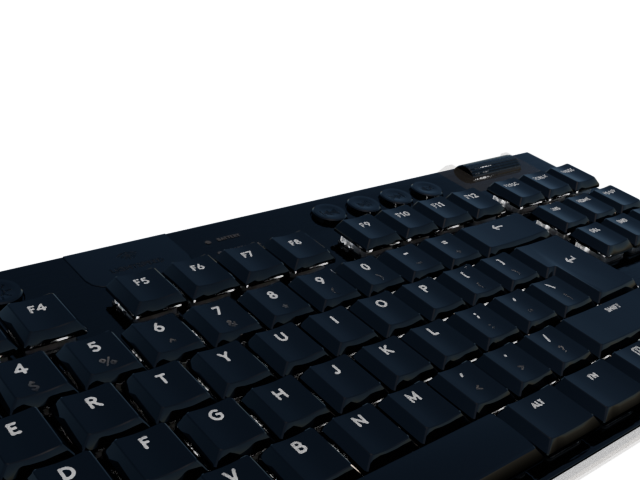

In [2]:
frame = 24

path = "keyboard_{'sun_intensity': 1.0, 'sun_elevation': 70.0, 'sun_rotation': 180.0, 'strength': 0.1}"
image = Image.open(f"blender/renders/{path}_{frame:03d}.png")
image

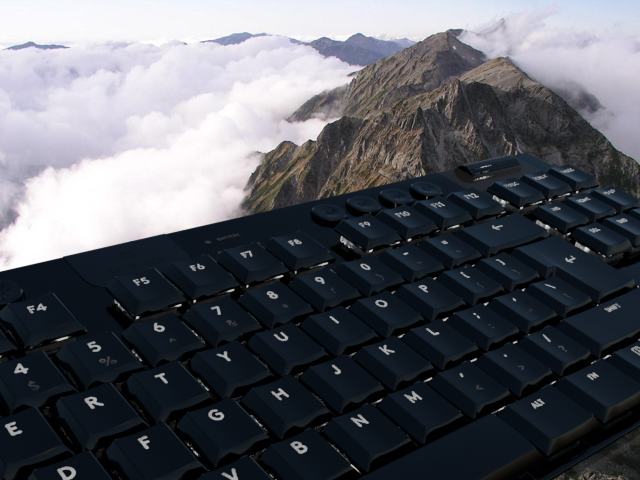

In [123]:
path = random.choice(os.listdir("assets/backgrounds"))
background = Image.open(f"assets/backgrounds/{path}")
background = background.resize(image.size)
background.paste(image, mask=image)
background = background
background

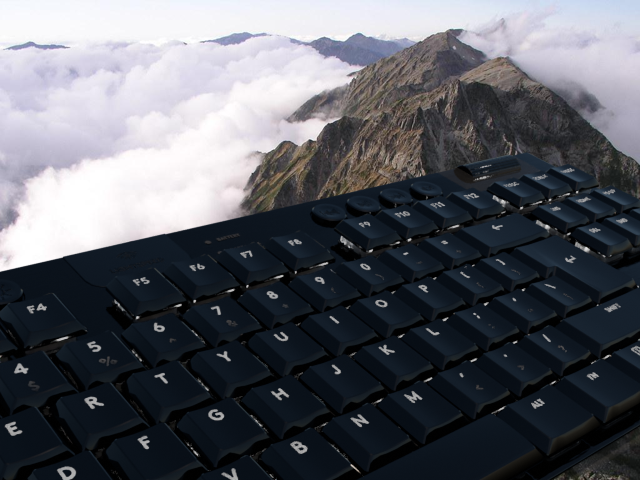

In [131]:
output = background.convert("RGBA")
overlay_funcs = (add_hard_overlay, add_soft_shadow)

for i in range(np.random.geometric(0.5, (1,))[0] - 1):
    overlay_func = random.choice(overlay_funcs)
    output = overlay_func(output)

output

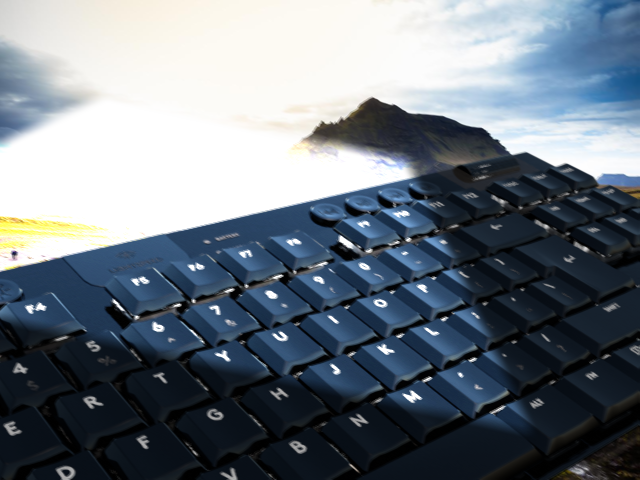

In [43]:
# Greater ksize = more motion blur
# Greater thickness = more gaussian blur

# TODO chromatic abberation

blur_kernel = get_motion_blur_kernel(theta=30, thickness=1, ksize=6)
blurred = cv.filter2D(np.array(output)[:, :, :3], ddepth=-1, kernel=blur_kernel)
Image.fromarray(blurred)

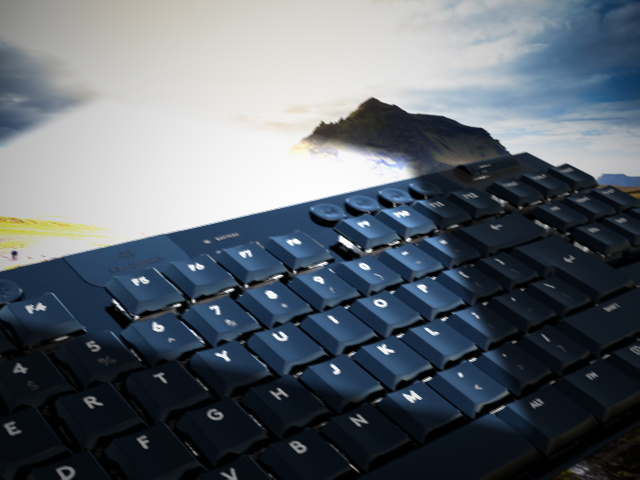

In [44]:
mask = get_vignette_kernel(400, image.size)
vignetted = (mask * blurred).astype("uint8")
vignetted = Image.fromarray(vignetted)
vignetted

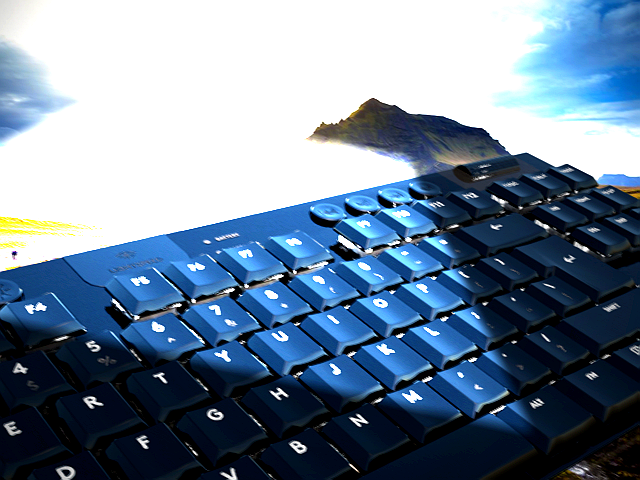

In [56]:
output = vignetted.copy()

contrast, exposure, sharpness, saturation = np.random.normal(loc=1.0, scale=0.5, size=4)
exposure = max(exposure, 0.4)
contrast = max(contrast, 0.2)

output = ImageEnhance.Contrast(output).enhance(contrast)
output = ImageEnhance.Brightness(output).enhance(exposure)
output = ImageEnhance.Sharpness(output).enhance(sharpness)
output = ImageEnhance.Color(output).enhance(saturation)
output